# **A project on predicting house prices**

---

This notebook presents a comprehensive analysis and predictive modeling project for predicting the prices of houses in Bangalore. The dataset includes various features such as area type, location, total square footage, number of bathrooms, balconies, and the number of bedrooms (BHK). We will preprocess the data, encode categorical features, and use machine learning techniques to train and evaluate our model. The final model will enable us to predict house prices accurately based on the provided features.


### **Attributes and Definitions in the dataset:**

There are total of 9 features

1. Area_type - describes the area Availability - when it can be possessed or when it is ready(categorical and time-series) 
2. Location - where it is located in Bengaluru 
3. Price - Value of the property in lakhs(INR) Size - in BHK or Bedroom (1-10 or more) 
4. Society - to which society it belongs Total_sqft - size of the property in square feet 
5. Bath - No. of bathrooms 
6. Balcony - No. of the balcony Problem Statement

### **Project Goal**

With the given 9 features(categorical and continuous) build a model to predict the price of houses in Bengaluru.

### **Key Steps:**

**Data Preprocessing:** Before training the machine learning models, the data undergoes preprocessing steps to handle missing values, encode categorical variables, dropping irrelevant columns and feature engineering. This ensures that the data is properly prepared for model training and improves the model's performance.

**Model Building:** The notebook demonstrates the process of building and evaluating machine learning models for term deposit subscription prediction. Various classification algorithms, such as logistic regression, decision trees, random forests, etc., are explored. Grid search is used for hyperparameter tuning to optimize model performance.

**Conclusion:** Finally, the notebook concludes with a summary of the findings and recommendations for further improvement or future work.


---

# **Data Preprocessing**

**Importing all the libraries to be used**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

### **Loading the dataset**

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

### **Droping the irrelevent columns**

Right now, no column seems irrelevant, so we will keep the dataframe as it is

### **Taking care of the missing data**

In [5]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

We can see that the society feature is missing in significant amount of the records, so we will drop that column

In [6]:
df2 = df1.drop(axis="columns", columns="society")

We will now fill the NA values in bathroom with average number of bathrooms rounded off

In [7]:
df2['bath'] = df2['bath'].fillna(df2['bath'].mean().round())

At last, we will drop all the rows with NA value

In [8]:
df2 = df2.dropna()

In [9]:
df2.shape

(12710, 8)

### **Cleaning the data**

In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

We can see another problem with the dataset in the 'size' column, which is the inconsistency in the different value of the column. The 'size' column is supposed to represent the number of bedrooms in the house. So we will use the split function to extract the number

In [11]:
df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [12]:
df2[['BHK', 'size']]

,BHK,size
0,2,2 BHK
1,4,4 Bedroom
2,3,3 BHK
3,3,3 BHK
4,2,2 BHK
...,...,...
13314,3,3 BHK
13315,5,5 Bedroom
13317,2,2 BHK
13318,4,4 BHK


In [13]:
type(df2.BHK[0])

numpy.int64

In [14]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Here, we can again see the lack of consistency, where some values are singleton and some values are ranges. We will first separate the values which are float(singleton) and values which are not float

In [15]:
def is_float(value):
    try:
        float(value)
    except:
        return False
    return True

In [16]:
df2[~df2['total_sqft'].apply(lambda x: is_float(x))]

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...,...,...
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


We can see that, besides range, there are still values which are inconsistent, we will ignore those and only handle ranges. We will take the average value of the upper and lower bounds

In [17]:
def convert_to_float(value):
    tokens = value.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(value)
    except ValueError:
        return None

In [18]:
df2['total_sqft'] = df2['total_sqft'].apply(lambda x: convert_to_float(x))

### **Feature Engineering**

In [19]:
df3 = df2.copy()

In this section we will be adding some new columns, one of them is price_per_sqft, which as suggested by its name, is a price of a house per square feet

In [20]:
df3['price_per_sqft'] = (df3['price'] * 100000)/df3['total_sqft']

In [21]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [22]:
len(df3['location'].unique())

1265

We can see that there are 1265 locations in the dataset. These many locations will be hard to manage as they are categorical variable and they need to be encoded. So we will refer some of the locations as others whose frequency is less than some threshold

In [23]:
df3['location'] = df3['location'].apply(lambda x: x.strip())

In [24]:
location_freq = df3.groupby('location')['location'].value_counts().sort_values(ascending=False)

In [25]:
location_freq

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: count, Length: 1254, dtype: int64

In [26]:
len(location_freq[location_freq <= 50])

1205

So, 50 seems like a pretty good threshold

In [27]:
other_location = location_freq[location_freq <= 50]

In [28]:
df3['location'] = df3['location'].apply(lambda x: 'other' if x in other_location else x)

In [29]:
df3.location

0        Electronic City Phase II
1                           other
2                     Uttarahalli
3                           other
4                        Kothanur
                   ...           
13314                       other
13315                  Whitefield
13317       Raja Rajeshwari Nagar
13318                       other
13319                       other
Name: location, Length: 12710, dtype: object

In [30]:
len(df3['location'].unique())

50

### **Outlier Detection**

Firstly, we will remove the outliers based on 'square feet per room' metric. Typically, in any house, the number of sq ft per room is 300 at the very least. So, if there are homes that have less sq ft per room, than they are anomaly and we should remove them.

In [31]:
df3[df3['total_sqft']/df3['BHK'] < 300]

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
58,Plot Area,Ready To Move,other,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,other,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Ready To Move,other,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Ready To Move,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...,...,...,...
13219,Plot Area,Ready To Move,other,7 Bedroom,1590.0,9.0,3.0,132.0,7,8301.886792
13221,Plot Area,Ready To Move,other,9 Bedroom,1178.0,9.0,1.0,75.0,9,6366.723260
13281,Plot Area,Ready To Move,other,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Plot Area,Ready To Move,other,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


In [32]:
df3.shape

(12710, 10)

In [33]:
df4 = df3[~(df3['total_sqft']/df3['BHK'] < 300)]

In [34]:
df4.shape

(12055, 10)

Now we will remove the outliers based on 'price_per_sqft' column. We will remove the data for which the 'price_per_sqft' lies outside the 2 standard deviation of the distribution of the same.

In [35]:
def remove_pp_outliers(df: pd.DataFrame):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf['price_per_sqft'] > (m-std)) & (subdf['price_per_sqft'] <= (m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [36]:
df5 = remove_pp_outliers(df4)

In [37]:
df5.shape

(10347, 10)

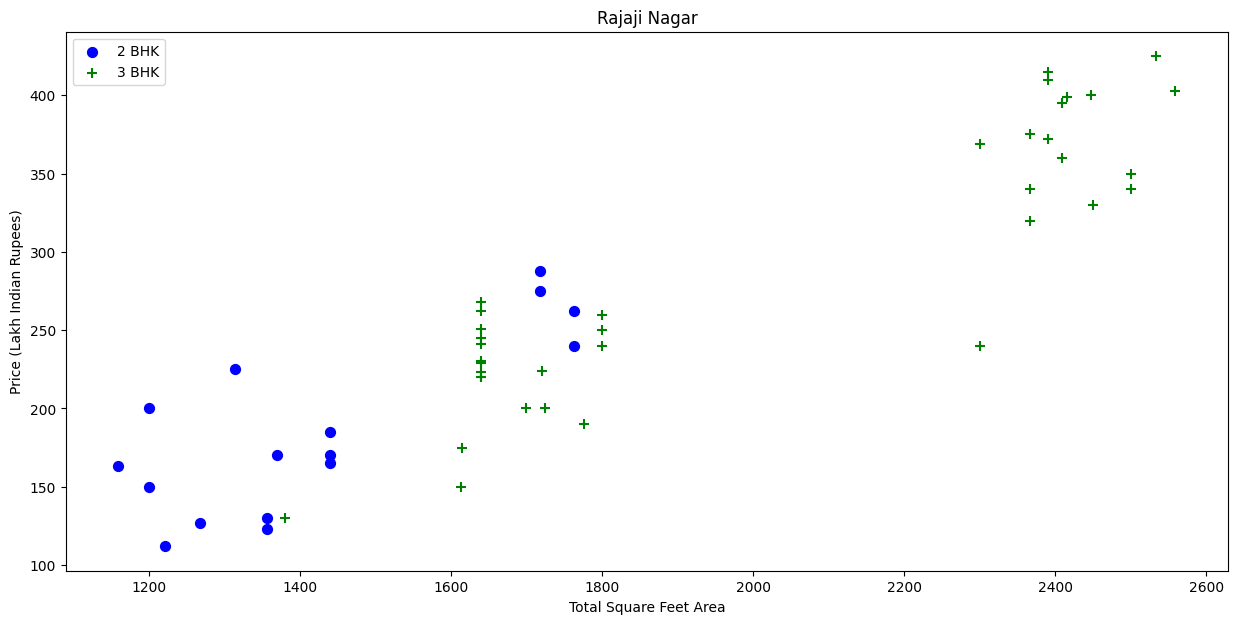

In [38]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.rcParams['figure.figsize'] = (15,7)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

We can see from the graph that some of the 2BHK houses are costlier than the 3BHK ones in the same area. This can be due to many reasons, such as amenities or structure of the house, which are outside the scope of this dataset. So we will remove these irregularities.

We should also remove properties where for same location, the price of (for example) 3 bedrooms apartment is less than 2 bedrooms apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

    {
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },   
    }
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape

(6214, 10)

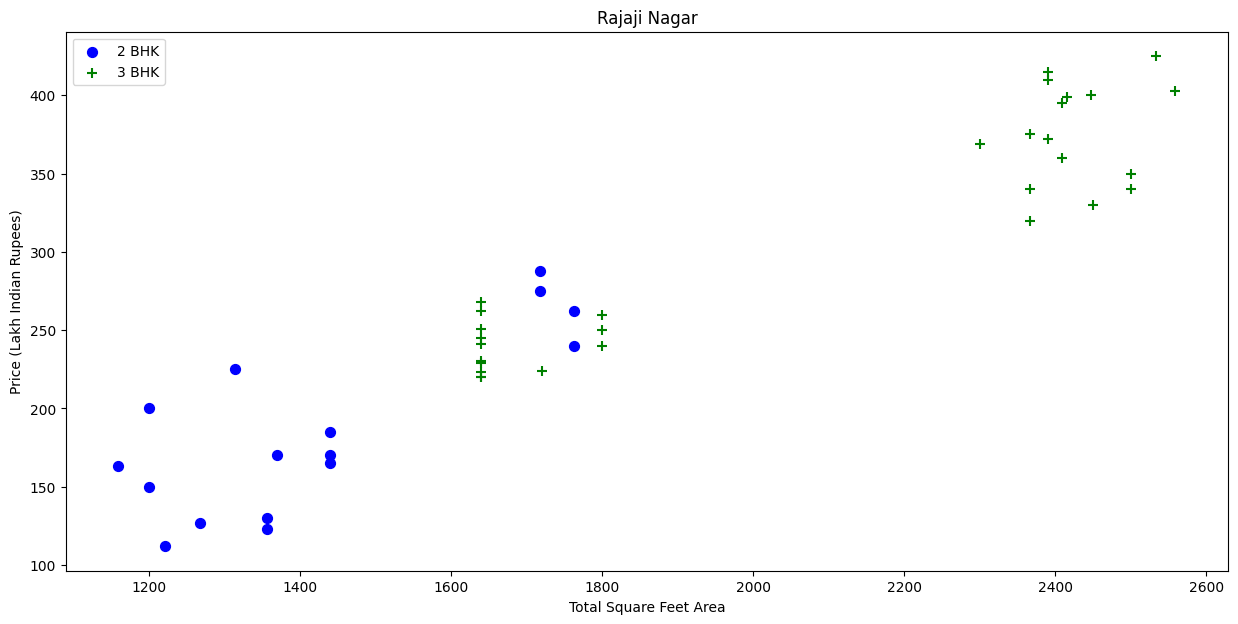

In [40]:
plot_scatter_chart(df6,"Rajaji Nagar")

We can see that the previous irregularities are not present anymore

Now we will remove the outliers using no of bathrooms

In [41]:
df6['bath'].unique()

array([ 2.,  3.,  4.,  1.,  5.,  6.,  9.,  7.,  8., 13., 10.])

In [42]:
df6[df6['bath']>=10]

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
8841,Super built-up Area,Ready To Move,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424
9372,Built-up Area,Ready To Move,other,10 Bedroom,7200.0,10.0,3.0,200.0,10,2777.777778


As a general rule of thumb we can remember that the number of bathrooms should be less than or equal to 'no. of rooms'+2

In [43]:
df7 = df6[df6['bath']< df6['BHK']+2]
df7.shape

(6158, 10)

In [44]:
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1080.0,2.0,2.0,72.0,2,6666.666667
1,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1270.0,2.0,2.0,93.0,2,7322.834646
2,Built-up Area,Ready To Move,7th Phase JP Nagar,3 BHK,1420.0,2.0,1.0,100.0,3,7042.253521
3,Built-up Area,Ready To Move,7th Phase JP Nagar,3 BHK,1850.0,3.0,1.0,150.0,3,8108.108108
4,Built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1245.0,2.0,1.0,94.0,2,7550.200803


# **Dropping irrelevant columns**

In [45]:
df8 = df7.drop(['size', 'price_per_sqft','availability'], axis=1)

Now we have our final DataFrame on which we can further work our way through

In [46]:
df8.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Built-up Area,7th Phase JP Nagar,1080.0,2.0,2.0,72.0,2
1,Super built-up Area,7th Phase JP Nagar,1270.0,2.0,2.0,93.0,2
2,Built-up Area,7th Phase JP Nagar,1420.0,2.0,1.0,100.0,3
3,Built-up Area,7th Phase JP Nagar,1850.0,3.0,1.0,150.0,3
4,Built-up Area,7th Phase JP Nagar,1245.0,2.0,1.0,94.0,2


### **Dividing the dataset into Independent and Dependent variables**

In [47]:
X = df8.drop('price', axis=1).values
y = df8['price'].values

In [48]:
print(X)

[['Built-up  Area' '7th Phase JP Nagar' 1080.0 2.0 2.0 2]
 ['Super built-up  Area' '7th Phase JP Nagar' 1270.0 2.0 2.0 2]
 ['Built-up  Area' '7th Phase JP Nagar' 1420.0 2.0 1.0 3]
 ...
 ['Super built-up  Area' 'other' 1715.0 3.0 3.0 3]
 ['Super built-up  Area' 'other' 4689.0 4.0 1.0 4]
 ['Super built-up  Area' 'other' 550.0 1.0 1.0 1]]


In [49]:
print(y)

[ 72.  93. 100. ... 112. 488.  17.]


### **Dividing data into training and test set**

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Encoding categorical data**

#### **Encoding the Independent Variable**

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

#### **Encoding the Dependent Variable**

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

**Now we will perform the most important step of the whole process, that is none other than, Creating a machine learning model**

# **Model Building**

**We will try some popular machine learning models to get the best results. To try all the regression algorithms we will use a technique called Grid Search. Which will find the best model and best parameters corresponding to that model**

In [53]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

def find_best_model_using_gridsearchcv(Xc,yc):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'XGBoost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators' : [100,200,300,400,500,600],
                'max_depth' : [1,2,3,4,5,6,7],
                'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7],
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators' : [100,200,300,400,500,600],
                'max_depth' : [1,2,3,4,5,6,7],
                'criterion' : ['friedman_mse'],
            }
        },
        'SVR': {
            'model': SVR(),
            'params': {
                'kernel' : ['rbf'],
                'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7],
                'C' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7],
            }
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(Xc,yc)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train,y_train)

,model,best_score,best_params
0,linear_regression,0.843382,{}
1,decision_tree,0.685352,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,XGBoost,0.847993,"{'gamma': 0.1, 'max_depth': 2, 'n_estimators':..."
3,random_forest,0.792609,"{'criterion': 'friedman_mse', 'max_depth': 7, ..."
4,SVR,0.015797,"{'C': 0.7, 'gamma': 0.1, 'kernel': 'rbf'}"


**Based on above results we can say that XG Boost  gives the best score. Hence, we will use that**

In [54]:
xg_regressor = XGBRegressor(n_estimators = 400, max_depth = 2, gamma=0.1)

In [55]:
xg_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
xg_regressor.score(X_test, y_test)

0.8950321416603576

#### **Predicting a single sample**

In [57]:
def predict_single_sample(house_area_type, house_location, sqft, number_of_bathroom, number_of_balcony, number_of_bedroom):
    return xg_regressor.predict(ct.transform([[house_area_type, house_location, sqft, number_of_bathroom, number_of_balcony, number_of_bedroom]]))

In [58]:
predict_single_sample('Built-up  Area','7th Phase JP Nagar', 1580.0, 2.0, 2.0, 6)

array([104.74112], dtype=float32)

In [59]:
predict_single_sample('Super built-up  Area', '7th Phase JP Nagar', 1270.0, 2.0, 2.0, 4)

array([93.18131], dtype=float32)

In [60]:
import pickle
with open('../server/artifacts/model.pickle','wb') as f:
    pickle.dump(xg_regressor,f)

In [61]:
import json
categorical = {
    'locations' : [col for col in df8['location'].unique()],
    'area_type' : [col for col in df8['area_type'].unique()]
}
with open("../server/artifacts/artifacts.json","w") as f:
    f.write(json.dumps(categorical))

In [62]:
with open('../server/artifacts/column_transformer.pickle', 'wb') as f:
    pickle.dump(ct, f)